In [11]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [6]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\archive (1)\movies.csv')

In [8]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [10]:
#cheaking how the data correlates to find how our budget affects our gross earning along with other factors 
df.corr(numeric_only = True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [14]:
#lets find the any missing data with for loop

for col in df.columns:
    np.mean(df[col].isnull())
    print('{}%'.format(col))

name%
rating%
genre%
year%
released%
score%
votes%
director%
writer%
star%
country%
budget%
gross%
company%
runtime%


In [21]:
#dropping data with missing values 
df = df.dropna()

In [25]:
#data types 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [27]:
#chaning the data type of the columns 

df['budget'] = df['budget'].astype('int64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11668\2843885117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')


In [24]:
df['gross'] = df['gross'].astype('int64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11668\383221082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')


In [29]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

In [46]:
#fixing the correct release date 

df['year release'] = df['released'].str.extract(pat='([0-9]{4})')

df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11668\2830601989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year release'] = df['released'].str.extract(pat='([0-9]{4})')


name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [57]:
#sorting by gros earning from least profitable 


df = df.sort_values(by = ['gross'],inplace=False,ascending=False)

In [47]:
pd.set_option('display.max.rows', 25)

In [48]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

In [50]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                 name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year          

In [51]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime year release  
0                            Warner Bros.    146.0         1980  
1                       Columbia Pictures    104.0         1980  
2                               Lucasfilm    124.0         1980  
3                      Paramount Pictures     88.0         1980  
4                          Orion Pictures     98.0         1980  
...                                   ...      ...          ...  
7648                    Columbia Pictures    124.0         2020  
7649                   Paramount Pictures     99.0         2020  
7650                   Universal Pictures    101.0         2020  
7651                 20th Century Studios    100.0         2020  
7652  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [54]:
df.corr

<bound method DataFrame.corr of                                                 name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                     

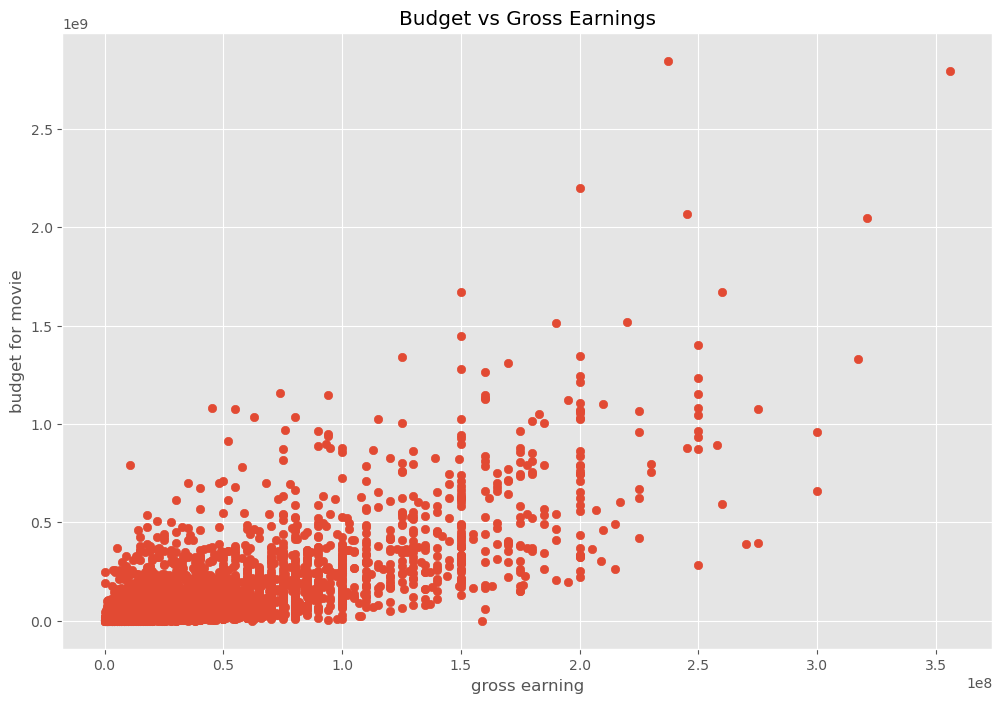

In [62]:
#ploting a scatter graph to show earning correlations


plt.scatter(x=df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('gross earning')
plt.ylabel('budget for movie')
plt.show()

In [60]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year release  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

<Axes: xlabel='budget', ylabel='gross'>

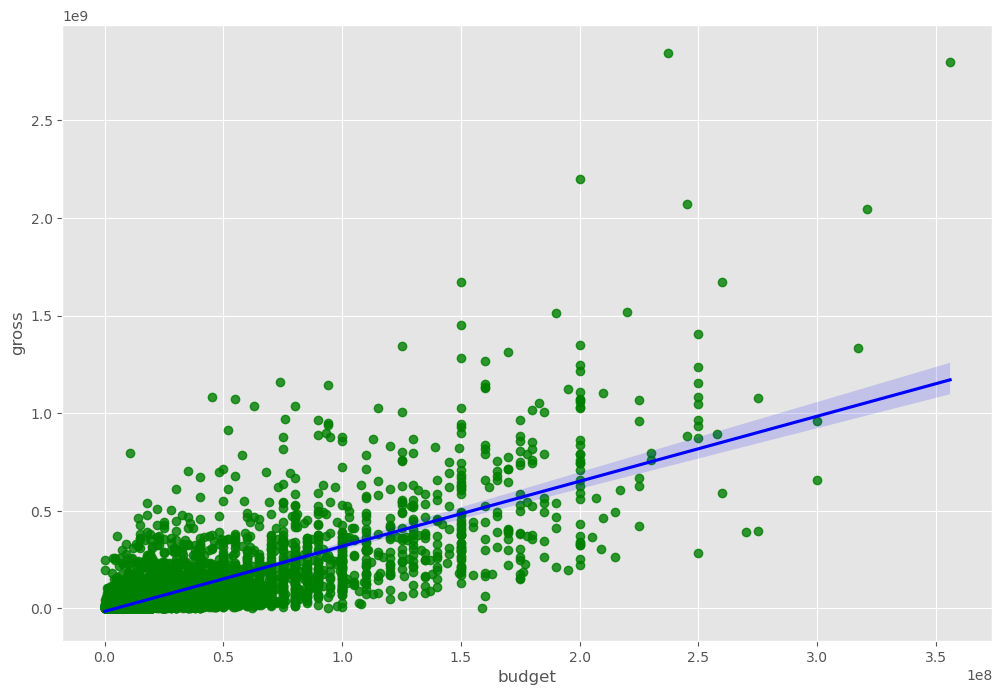

In [68]:
#ploting a reg graph to show linear earning correlations

sns.regplot(x='budget', y = 'gross', data=df, scatter_kws={"color": "green"}, line_kws={"color":"Blue"})

In [79]:
Corr_matrix = df.corr(numeric_only = True)

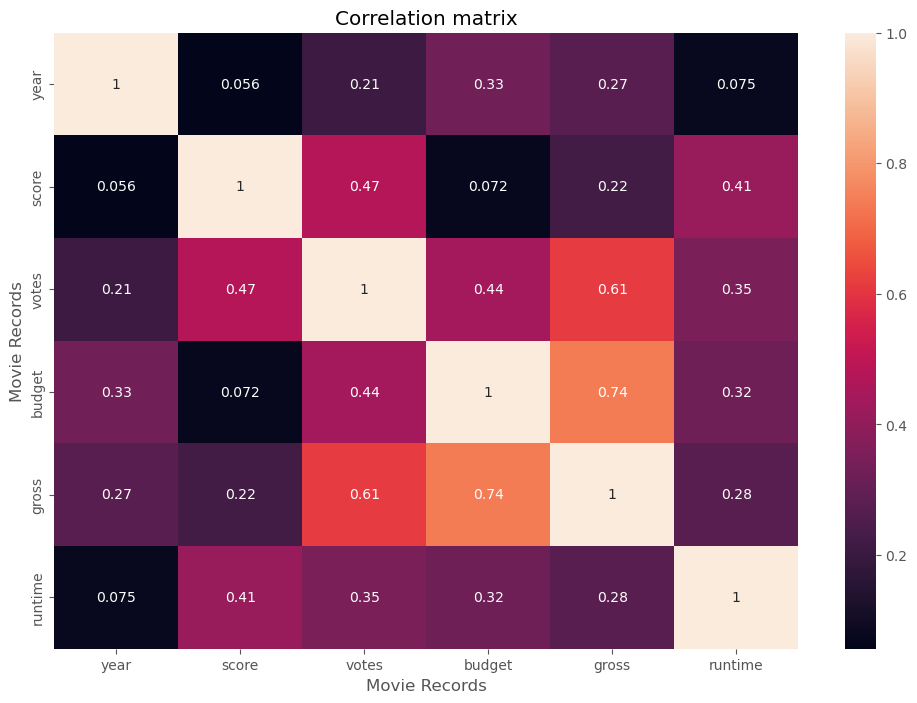

In [77]:
#making a correlation matrix

sns.heatmap(Corr_matrix, annot = True)
plt.title('Correlation matrix')
plt.xlabel('Movie Records')
plt.ylabel('Movie Records')
plt.show()

In [78]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year release  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

In [91]:
pair = Corr_matrix.unstack()

In [92]:
pair.sort_values()

year     score      0.056386
score    year       0.056386
budget   score      0.072001
score    budget     0.072001
year     runtime    0.075077
                      ...   
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
Length: 36, dtype: float64

In [95]:
highcorr = pair[(pair)> 0.6]

highcorr

year     year       1.000000
score    score      1.000000
votes    votes      1.000000
         gross      0.614751
budget   budget     1.000000
         gross      0.740247
gross    votes      0.614751
         budget     0.740247
         gross      1.000000
runtime  runtime    1.000000
dtype: float64

In [ ]:
#votes,budget,runtime has the highest correllation to the gross earning 